In [101]:
from tensorflow.keras.layers import *
from tensorflow.keras.activations import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.losses import *
from tensorflow.keras.metrics import *
from tensorflow.keras.initializers import *
from tensorflow.keras.utils import *
from tensorflow.keras.models import *
from tensorflow.keras.datasets import *
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import datetime
import os
import pandas as pd
from PIL import Image
from matplotlib import image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import EarlyStopping , ModelCheckpoint,ReduceLROnPlateau

In [102]:
main_path="C:\\Users\\Amrta\\Documents\\GitHub\\projetannuel4IABD2\\ETAPE_3\\Scripts_Recup_Data\\"
open_folder = os.listdir(main_path)
Data_base_learning = main_path+open_folder[3]
Data_base_learning_v2 = main_path+open_folder[4]
path2 = "C:\\Users\\Amrta\\Documents\\GitHub\\projetannuel4IABD2\\ETAPE_3\\Scripts_Recup_Data\\Projet_Annuel_Data\\"
open_folder1= os.listdir(path2)
Data_train = path2+open_folder1[10]
Data_test = path2+open_folder1[9]
print(open_folder1)
print(Data_test)

['.DS_Store', '.ipynb_checkpoints', '2014', '2015', '2016', '2017', '2018', 'All_years', 'Data_API.ipynb', 'Data_Test_Foot.csv', 'Data_Train_Foot.csv', 'Points_Equipe_Hist', 'Points_Equipe_Hist_VF', 'Recup_Data_Historical.ipynb', 'Teams_puiss.csv', 'Web_Score.ipynb']
C:\Users\Amrta\Documents\GitHub\projetannuel4IABD2\ETAPE_3\Scripts_Recup_Data\Projet_Annuel_Data\Data_Test_Foot.csv


Machine Amrta

In [103]:
filename = "C:\\Users\\Amrta\\Documents\\GitHub\\projetannuel4IABD2\\ETAPE_3\\Scripts_Recup_Data\\Projet_Annuel_Data\\Data_Train_Foot.csv"
filename_test= 'C:\\Users\\Amrta\\Documents\\GitHub\\projetannuel4IABD2\\ETAPE_3\\Scripts_Recup_Data\\Projet_Annuel_Data\\Data_Test_Foot.csv'

Machine Dylane

In [104]:
# filename = 'Scripts_Recup_Data/Projet_Annuel_Data/Data_Train_Foot.csv'
# filename_test= 'Scripts_Recup_Data/Projet_Annuel_Data/Data_Test_Foot.csv

In [105]:
# Chargement des données csv
data= pd.read_csv(filename,sep=";",index_col=0)
data
# y prend le score à prédire NbgoalsFullTime
data.head()
data.dtypes

date                             object
homeTeam                         object
awayTeam                         object
score                           float64
mi_temps_gagnante                 int64
goalHomeTeam_FullTime           float64
goalAwayTeam_FullTime           float64
goalHomeTeam_HalfTime           float64
goalAwayTeam_HalfTime           float64
NbgoalsHalfTime                 float64
NbgoalsFullTime                 float64
win_cons_home                     int64
win_cons_away                     int64
lose_cons_home                    int64
lose_cons_away                    int64
moy_goals_home                  float64
moy_goals_away                  float64
moy_goals_half_home             float64
moy_goals_half_away             float64
moy_goals_conceded_home         float64
moy_goals_conceded_away         float64
moy_goals_conceded_half_home    float64
moy_goals_conceded_half_away    float64
puissance_HomeTeam                int64
puissance_AwayTeam                int64


Construction du Y 

In [148]:
# #NbgoalsFullTime 10n23n24n
tab =data.values
for i in tab:
    if i[10]>2.5:
        i[24] = 2
    elif i[10]>1.5:
        i[24] = 1
    elif i[14]>0.5:
        i[24] = 0
    else:
         i[24] = 0
a = tab[:,24]
a.astype(int)

array([2, 1, 0, ..., 1, 2, 1])

In [160]:
data_x = data.copy()
data_x['buts_class'] = a.astype("int64")
data_x

,date,homeTeam,awayTeam,score,mi_temps_gagnante,goalHomeTeam_FullTime,goalAwayTeam_FullTime,goalHomeTeam_HalfTime,goalAwayTeam_HalfTime,NbgoalsHalfTime,...,moy_goals_away,moy_goals_half_home,moy_goals_half_away,moy_goals_conceded_home,moy_goals_conceded_away,moy_goals_conceded_half_home,moy_goals_conceded_half_away,puissance_HomeTeam,puissance_AwayTeam,buts_class
0,2019-08-09 00:00:00,AS Monaco FC,Olympique Lyonnais,2.0,1,0.0,3.0,0.0,2.0,2.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2409,6154,2
1,2019-08-10 00:00:00,Olympique de Marseille,Stade de Reims,2.0,2,0.0,2.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4008,3054,1
2,2019-08-10 00:00:00,Montpellier HSC,Stade Rennais FC 1901,2.0,1,0.0,1.0,0.0,1.0,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3029,4815,0
3,2019-08-10 00:00:00,OGC Nice,Amiens SC,1.0,2,2.0,1.0,1.0,0.0,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2803,2045,2
4,2019-08-10 00:00:00,Stade Brestois 29,Toulouse FC,0.0,1,1.0,1.0,1.0,0.0,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2156,1065,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,2019-05-18,Levante,Ath Madrid,0.0,0,2.0,2.0,2.0,0.0,2.0,...,1.678414,0.437086,0.678414,1.140969,0.660793,0.471366,0.229075,5198,10169,2
376,2019-05-18,Sevilla,Ath Bilbao,1.0,0,2.0,0.0,1.0,0.0,1.0,...,1.268722,0.651982,0.590308,1.312775,1.162996,0.603524,0.519824,9335,6881,1
377,2019-05-18,Valladolid,Valencia,2.0,0,0.0,2.0,0.0,1.0,1.0,...,1.506608,0.297297,0.722467,0.215859,1.246696,0.088106,0.533040,4109,12990,1
378,2019-05-19,Eibar,Barcelona,0.0,1,2.0,2.0,2.0,2.0,4.0,...,2.823789,0.572687,1.074890,1.392070,0.823789,0.629956,0.361233,4455,15917,2


In [161]:
# x1 = {'date':data_x.date,'homeTeam':data_x.homeTeam,'awayTeam':data_x.awayTeam,'score':data_x.score,'mi_temps_gagnante':data_x.mi_temps_gagnante,'goalHomeTeam_FullTime':data_x.goalHomeTeam_FullTime,'goalAwayTeam_FullTime':data_x.goalAwayTeam_FullTime,'goalHomeTeam_HalfTime':data_x.goalHomeTeam_HalfTime,'goalAwayTeam_HalfTime':data_x.goalAwayTeam_HalfTime,'NbgoalsHalfTime':data_x.NbgoalsHalfTime,'NbgoalsFullTime':data_x.NbgoalsFullTime, 'win_cons_home':data_x.win_cons_home,'win_cons_away':data_x.win_cons_away,'lose_cons_home':data_x.lose_cons_home,'lose_cons_away':data_x.lose_cons_away,
# 'moy_goals_home':data_x.moy_goals_home,'moy_goals_away':data_x.moy_goals_away,'moy_goals_half_home':data_x.moy_goals_half_home,'moy_goals_half_away':data_x.moy_goals_half_away,'moy_goals_conceded_home':data_x.moy_goals_conceded_home,'moy_goals_conceded_away':data_x.moy_goals_conceded_away,'moy_goals_conceded_half_home':data_x.moy_goals_conceded_half_home,'moy_goals_conceded_half_away':data_x.moy_goals_conceded_half_away,'puissance_HomeTeam':data_x.puissance_HomeTeam,'puissance_AwayTeam':data_x.puissance_AwayTeam,'buts_class':tab[:,25]}

# x1 = pd.DataFrame(x1)
# x1

In [162]:
# x1.dtypes

In [163]:
data_test= pd.read_csv(filename_test,sep=";",index_col=0)
x_prediction=data_test[['date','status','id_match','homeTeam','awayTeam','idHomeTeam','idAwayTeam',
                        'puissance_HomeTeam','puissance_AwayTeam','win_cons_home','win_cons_away',
                        'lose_cons_home','lose_cons_away','moy_goals_home','moy_goals_away',
                        'moy_goals_half_home','moy_goals_half_away','moy_goals_conceded_home',
                        'moy_goals_conceded_away','moy_goals_conceded_half_home',
                        'moy_goals_conceded_half_away']]
x_prediction


,date,status,id_match,homeTeam,awayTeam,idHomeTeam,idAwayTeam,puissance_HomeTeam,puissance_AwayTeam,win_cons_home,...,lose_cons_home,lose_cons_away,moy_goals_home,moy_goals_away,moy_goals_half_home,moy_goals_half_away,moy_goals_conceded_home,moy_goals_conceded_away,moy_goals_conceded_half_home,moy_goals_conceded_half_away
1424,2020-07-01,FINISHED,279508,ACF Fiorentina,US Sassuolo Calcio,99,471,2679,3086,0,...,1,0,1.214286,1.714286,0.500000,0.750000,1.392857,1.750000,0.535714,0.928571
1085,2020-07-01,FINISHED,273889,Real Betis Balompié,Villarreal CF,90,94,8949,5396,0,...,1,0,1.343750,1.593750,0.625000,0.687500,1.625000,1.250000,0.718750,0.343750
1423,2020-07-01,FINISHED,279512,Bologna FC 1909,Cagliari Calcio,103,104,3818,2866,1,...,0,0,1.428571,1.678571,0.535714,0.642857,1.607143,1.571429,0.892857,0.535714
1983,2020-07-01,FINISHED,274431,Sporting Clube de Portugal,Gil Vicente FC,498,5533,5314,1346,3,...,0,0,1.607143,1.071429,0.892857,0.428571,1.035714,1.250000,0.428571,0.678571
1982,2020-07-01,FINISHED,274433,Os Belenenses Futebol,CD Tondela,5568,1049,1589,1729,0,...,2,2,0.857143,0.821429,0.571429,0.392857,1.571429,1.250000,0.678571,0.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024,2020-07-26,SCHEDULED,274477,Sport Lisboa e Benfica,Sporting Clube de Portugal,1903,498,6562,5314,1,...,0,0,2.000000,1.566667,0.694444,0.866667,1.166667,1.000000,0.433333,0.400000
2025,2020-07-26,SCHEDULED,274478,Vitória FC,Os Belenenses Futebol,5620,5568,3593,1589,0,...,5,1,0.774194,0.833333,0.322581,0.566667,1.366667,1.666667,0.566667,0.700000
2026,2020-07-26,SCHEDULED,274479,CD Santa Clara,Vitória SC,5530,5543,3175,3593,0,...,2,0,0.966667,1.633333,0.400000,0.666667,1.200000,1.066667,0.500000,0.633333
2027,2020-07-26,SCHEDULED,274480,Portimonense SC,CD Aves,5601,5544,1067,1159,0,...,2,0,0.806452,0.774194,0.419355,0.483871,1.354839,1.903226,0.612903,0.741935


# Sans les win/lose/cons et les moyennes half_time plus utiles pour les modèles de predic mi-temps

In [164]:
x=data_x[['puissance_HomeTeam','puissance_AwayTeam','moy_goals_home','moy_goals_away','moy_goals_conceded_home',
        'moy_goals_conceded_away']]

data_test= pd.read_csv(filename_test,sep=";",index_col=0)
x_prediction=data_test[['date','status','id_match','homeTeam','awayTeam','idHomeTeam','idAwayTeam',
                        'puissance_HomeTeam','puissance_AwayTeam','moy_goals_home','moy_goals_away',
                        'moy_goals_conceded_home','moy_goals_conceded_away']]
x_prediction


,date,status,id_match,homeTeam,awayTeam,idHomeTeam,idAwayTeam,puissance_HomeTeam,puissance_AwayTeam,moy_goals_home,moy_goals_away,moy_goals_conceded_home,moy_goals_conceded_away
1424,2020-07-01,FINISHED,279508,ACF Fiorentina,US Sassuolo Calcio,99,471,2679,3086,1.214286,1.714286,1.392857,1.750000
1085,2020-07-01,FINISHED,273889,Real Betis Balompié,Villarreal CF,90,94,8949,5396,1.343750,1.593750,1.625000,1.250000
1423,2020-07-01,FINISHED,279512,Bologna FC 1909,Cagliari Calcio,103,104,3818,2866,1.428571,1.678571,1.607143,1.571429
1983,2020-07-01,FINISHED,274431,Sporting Clube de Portugal,Gil Vicente FC,498,5533,5314,1346,1.607143,1.071429,1.035714,1.250000
1982,2020-07-01,FINISHED,274433,Os Belenenses Futebol,CD Tondela,5568,1049,1589,1729,0.857143,0.821429,1.571429,1.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024,2020-07-26,SCHEDULED,274477,Sport Lisboa e Benfica,Sporting Clube de Portugal,1903,498,6562,5314,2.000000,1.566667,1.166667,1.000000
2025,2020-07-26,SCHEDULED,274478,Vitória FC,Os Belenenses Futebol,5620,5568,3593,1589,0.774194,0.833333,1.366667,1.666667
2026,2020-07-26,SCHEDULED,274479,CD Santa Clara,Vitória SC,5530,5543,3175,3593,0.966667,1.633333,1.200000,1.066667
2027,2020-07-26,SCHEDULED,274480,Portimonense SC,CD Aves,5601,5544,1067,1159,0.806452,0.774194,1.354839,1.903226


In [165]:
y = data_x.buts_class

In [166]:
x=np.array(x)
y=np.array(y)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

y_train = y_train.astype(np.int)
classes=np.unique(y_train)
nbClasses=len(classes)
print(x_train.shape,y_train.shape)
print(nbClasses)


(9238, 6) (9238,)
3


In [187]:
def create_model():
    
    model = Sequential()
    model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(3, activation='softmax'))    
    model.compile(loss="sparse_categorical_crossentropy",
                  optimizer=Adam(),
                  metrics=["accuracy"])
    return model

In [188]:
model = create_model()
print(model.summary())

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_105 (Dense)            (None, 512)               3584      
_________________________________________________________________
dense_106 (Dense)            (None, 128)               65664     
_________________________________________________________________
dense_107 (Dense)            (None, 512)               66048     
_________________________________________________________________
dense_108 (Dense)            (None, 128)               65664     
_________________________________________________________________
dense_109 (Dense)            (None, 512)               66048     
_________________________________________________________________
dense_110 (Dense)            (None, 128)               65664     
_________________________________________________________________
dense_111 (Dense)            (None, 3)                

In [189]:
save = ModelCheckpoint('model_buts.h5', monitor = 'val_accuracy' , verbose = 1 , save_best_only = True)

In [190]:
history = model.fit(x_train, y_train,validation_data=(x_test,y_test),batch_size=90,epochs=100,
                    callbacks = [save])

Train on 9238 samples, validate on 2310 samples
Epoch 1/100
9000/9238 [============================>.] - ETA: 0s - loss: 50.2669 - accuracy: 0.3802
Epoch 00001: val_accuracy improved from -inf to 0.41212, saving model to model_buts.h5
9238/9238 [==============================] - 1s 115us/sample - loss: 49.1284 - accuracy: 0.3798 - val_loss: 3.8596 - val_accuracy: 0.4121
Epoch 2/100
9180/9238 [============================>.] - ETA: 0s - loss: 2.7976 - accuracy: 0.3867
Epoch 00002: val_accuracy improved from 0.41212 to 0.42208, saving model to model_buts.h5
9238/9238 [==============================] - 1s 61us/sample - loss: 2.7971 - accuracy: 0.3868 - val_loss: 2.3941 - val_accuracy: 0.4221
Epoch 3/100
9180/9238 [============================>.] - ETA: 0s - loss: 1.8198 - accuracy: 0.3869
Epoch 00003: val_accuracy improved from 0.42208 to 0.42814, saving model to model_buts.h5
9238/9238 [==============================] - 1s 71us/sample - loss: 1.8174 - accuracy: 0.3863 - val_loss: 1.4852 

8730/9238 [===========================>..] - ETA: 0s - loss: 1.0375 - accuracy: 0.5037
Epoch 00028: val_accuracy did not improve from 0.50952
9238/9238 [==============================] - 1s 61us/sample - loss: 1.0382 - accuracy: 0.5027 - val_loss: 1.0342 - val_accuracy: 0.5091
Epoch 29/100
8820/9238 [===========================>..] - ETA: 0s - loss: 1.0363 - accuracy: 0.5045
Epoch 00029: val_accuracy did not improve from 0.50952
9238/9238 [==============================] - 1s 71us/sample - loss: 1.0375 - accuracy: 0.5027 - val_loss: 1.0348 - val_accuracy: 0.5091
Epoch 30/100
8730/9238 [===========================>..] - ETA: 0s - loss: 1.0383 - accuracy: 0.5018
Epoch 00030: val_accuracy did not improve from 0.50952
9238/9238 [==============================] - 1s 71us/sample - loss: 1.0378 - accuracy: 0.5026 - val_loss: 1.0347 - val_accuracy: 0.5091
Epoch 31/100
9000/9238 [============================>.] - ETA: 0s - loss: 1.0371 - accuracy: 0.5032
Epoch 00031: val_accuracy did not improv

8820/9238 [===========================>..] - ETA: 0s - loss: 1.0373 - accuracy: 0.5029
Epoch 00056: val_accuracy did not improve from 0.50952
9238/9238 [==============================] - 1s 68us/sample - loss: 1.0376 - accuracy: 0.5023 - val_loss: 1.0346 - val_accuracy: 0.5087
Epoch 57/100
8460/9238 [==========================>...] - ETA: 0s - loss: 1.0370 - accuracy: 0.5033
Epoch 00057: val_accuracy did not improve from 0.50952
9238/9238 [==============================] - 1s 63us/sample - loss: 1.0377 - accuracy: 0.5023 - val_loss: 1.0337 - val_accuracy: 0.5087
Epoch 58/100
8550/9238 [==========================>...] - ETA: 0s - loss: 1.0396 - accuracy: 0.4996
Epoch 00058: val_accuracy did not improve from 0.50952
9238/9238 [==============================] - 1s 69us/sample - loss: 1.0375 - accuracy: 0.5024 - val_loss: 1.0341 - val_accuracy: 0.5087
Epoch 59/100
8640/9238 [===========================>..] - ETA: 0s - loss: 1.0388 - accuracy: 0.5007
Epoch 00059: val_accuracy did not improv

8730/9238 [===========================>..] - ETA: 0s - loss: 1.0375 - accuracy: 0.5027
Epoch 00084: val_accuracy did not improve from 0.50952
9238/9238 [==============================] - 1s 67us/sample - loss: 1.0376 - accuracy: 0.5026 - val_loss: 1.0349 - val_accuracy: 0.5091
Epoch 85/100
8910/9238 [===========================>..] - ETA: 0s - loss: 1.0357 - accuracy: 0.5053
Epoch 00085: val_accuracy did not improve from 0.50952
9238/9238 [==============================] - 1s 60us/sample - loss: 1.0379 - accuracy: 0.5026 - val_loss: 1.0342 - val_accuracy: 0.5091
Epoch 86/100
9180/9238 [============================>.] - ETA: 0s - loss: 1.0377 - accuracy: 0.5022
Epoch 00086: val_accuracy did not improve from 0.50952
9238/9238 [==============================] - 1s 65us/sample - loss: 1.0375 - accuracy: 0.5025 - val_loss: 1.0346 - val_accuracy: 0.5091
Epoch 87/100
8550/9238 [==========================>...] - ETA: 0s - loss: 1.0377 - accuracy: 0.5020
Epoch 00087: val_accuracy did not improv

Text(0, 0.5, 'Accuracy')

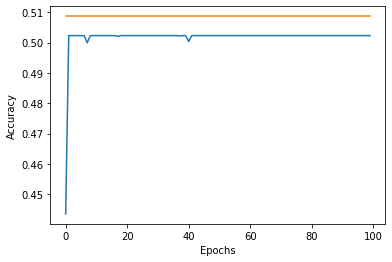

In [177]:
plt.plot(history.history['accuracy'],label='Accuracy')#bleu
plt.plot(history.history['val_accuracy'],label='validation_Accuracy')#orange
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# Prédiction

In [181]:
unique = x_prediction.values
results = []

i = 0
unique[1]

array(['2020-07-01', 'FINISHED', 273889, 'Real Betis Balompié',
       'Villarreal CF', 90, 94, 8949, 5396, 1.34375, 1.59375, 1.625, 1.25],
      dtype=object)

In [182]:
model.load_weights("model_buts.h5")

In [183]:
for i in unique:
    predictions_final = model.predict(np.array([[i[7],i[8],i[9],i[10],i[11],i[12]]])) 
    result = np.argmax(predictions_final)
    results.append(result)
    print(result)

2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2


In [184]:
np.asarray(results)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
      dtype=int64)

In [185]:
df = {'date':x_prediction.date,'id_match':x_prediction.id_match,'status':x_prediction.status,'id_HomeTeam':x_prediction.idHomeTeam,'id_AwayTeam':x_prediction.idAwayTeam,
      'homeTeam':x_prediction.homeTeam,'AwayTeam':x_prediction.awayTeam,'buts_class':results}
df = pd.DataFrame(df)
df

,date,id_match,status,id_HomeTeam,id_AwayTeam,homeTeam,AwayTeam,buts_class
1424,2020-07-01,279508,FINISHED,99,471,ACF Fiorentina,US Sassuolo Calcio,2
1085,2020-07-01,273889,FINISHED,90,94,Real Betis Balompié,Villarreal CF,2
1423,2020-07-01,279512,FINISHED,103,104,Bologna FC 1909,Cagliari Calcio,2
1983,2020-07-01,274431,FINISHED,498,5533,Sporting Clube de Portugal,Gil Vicente FC,2
1982,2020-07-01,274433,FINISHED,5568,1049,Os Belenenses Futebol,CD Tondela,2
...,...,...,...,...,...,...,...,...
2024,2020-07-26,274477,SCHEDULED,1903,498,Sport Lisboa e Benfica,Sporting Clube de Portugal,2
2025,2020-07-26,274478,SCHEDULED,5620,5568,Vitória FC,Os Belenenses Futebol,2
2026,2020-07-26,274479,SCHEDULED,5530,5543,CD Santa Clara,Vitória SC,2
2027,2020-07-26,274480,SCHEDULED,5601,5544,Portimonense SC,CD Aves,2


In [186]:
df.to_csv('predictions_mi_temps_gagnante.csv',index = False)
df.to_json (r'predictions_mi_temps_gagnante.json')

In [64]:
finished = []
scheduled = []

In [65]:
for i in df.values:
    if i[2] == 'FINISHED':
        finished.append(i)
    else:
        scheduled.append(i)

In [67]:
column_names = ["date","id_match", "status","id_HomeTeam","id_AwayTeam","homeTeam","AwayTeam","mi_temps_gagnante"]
df_fini = pd.DataFrame(finished,columns = column_names)
df_programme = pd.DataFrame(scheduled,columns = column_names)

In [68]:
df_fini

,date,id_match,status,id_HomeTeam,id_AwayTeam,homeTeam,AwayTeam,mi_temps_gagnante
0,2020-07-01,279508,FINISHED,99,471,ACF Fiorentina,US Sassuolo Calcio,2
1,2020-07-01,273889,FINISHED,90,94,Real Betis Balompié,Villarreal CF,2
2,2020-07-01,279512,FINISHED,103,104,Bologna FC 1909,Cagliari Calcio,2
3,2020-07-01,274431,FINISHED,498,5533,Sporting Clube de Portugal,Gil Vicente FC,2
4,2020-07-01,274433,FINISHED,5568,1049,Os Belenenses Futebol,CD Tondela,2
...,...,...,...,...,...,...,...,...
82,2020-07-09,279534,FINISHED,450,108,Hellas Verona FC,FC Internazionale Milano,2
83,2020-07-09,273907,FINISHED,89,88,RCD Mallorca,Levante UD,2
84,2020-07-09,273913,FINISHED,278,745,SD Eibar,CD Leganés,2
85,2020-07-09,264674,FINISHED,62,340,Everton FC,Southampton FC,2


In [69]:
df_programme

,date,id_match,status,id_HomeTeam,id_AwayTeam,homeTeam,AwayTeam,mi_temps_gagnante
0,2020-07-11,264686,SCHEDULED,68,563,Norwich City FC,West Ham United FC,2
1,2020-07-11,264689,SCHEDULED,346,67,Watford FC,Newcastle United FC,2
2,2020-07-11,264683,SCHEDULED,64,328,Liverpool FC,Burnley FC,2
3,2020-07-11,264687,SCHEDULED,356,61,Sheffield United FC,Chelsea FC,2
4,2020-07-11,264688,SCHEDULED,397,65,Brighton & Hove Albion FC,Manchester City FC,2
...,...,...,...,...,...,...,...,...
172,2020-07-26,274477,SCHEDULED,1903,498,Sport Lisboa e Benfica,Sporting Clube de Portugal,2
173,2020-07-26,274478,SCHEDULED,5620,5568,Vitória FC,Os Belenenses Futebol,2
174,2020-07-26,274479,SCHEDULED,5530,5543,CD Santa Clara,Vitória SC,2
175,2020-07-26,274480,SCHEDULED,5601,5544,Portimonense SC,CD Aves,2


In [70]:
df_fini.to_csv('predictions_mi_temps_gagnante_finished.csv',index=False)
df_fini.to_json (r'predictions_mi_temps_gagnante_finished.json')

In [71]:
df_programme.to_csv('predictions_mi_temps_gagnante_scheduled.csv',index=False)
df_programme.to_json (r'predictions_mi_temps_gagnante_scheduled.json')